# Spearman's Rank Correlation & Chi-Square Table Test Using Scipy in Python - Tutorial 15

[Spearman's rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

# Non-Paramteric methods using pandas and scipy

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb

import scipy as sc
from scipy.stats import spearmanr

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 12
sb.set_style('whitegrid')

In [7]:
uri = 'data/mtcars.csv'
cars = pd.read_csv(uri)
columns = list(cars.columns.values)
columns[0] = 'car_names'
cars.columns = columns
cars.index = cars.car_names
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## The Spearman Rank Correlation

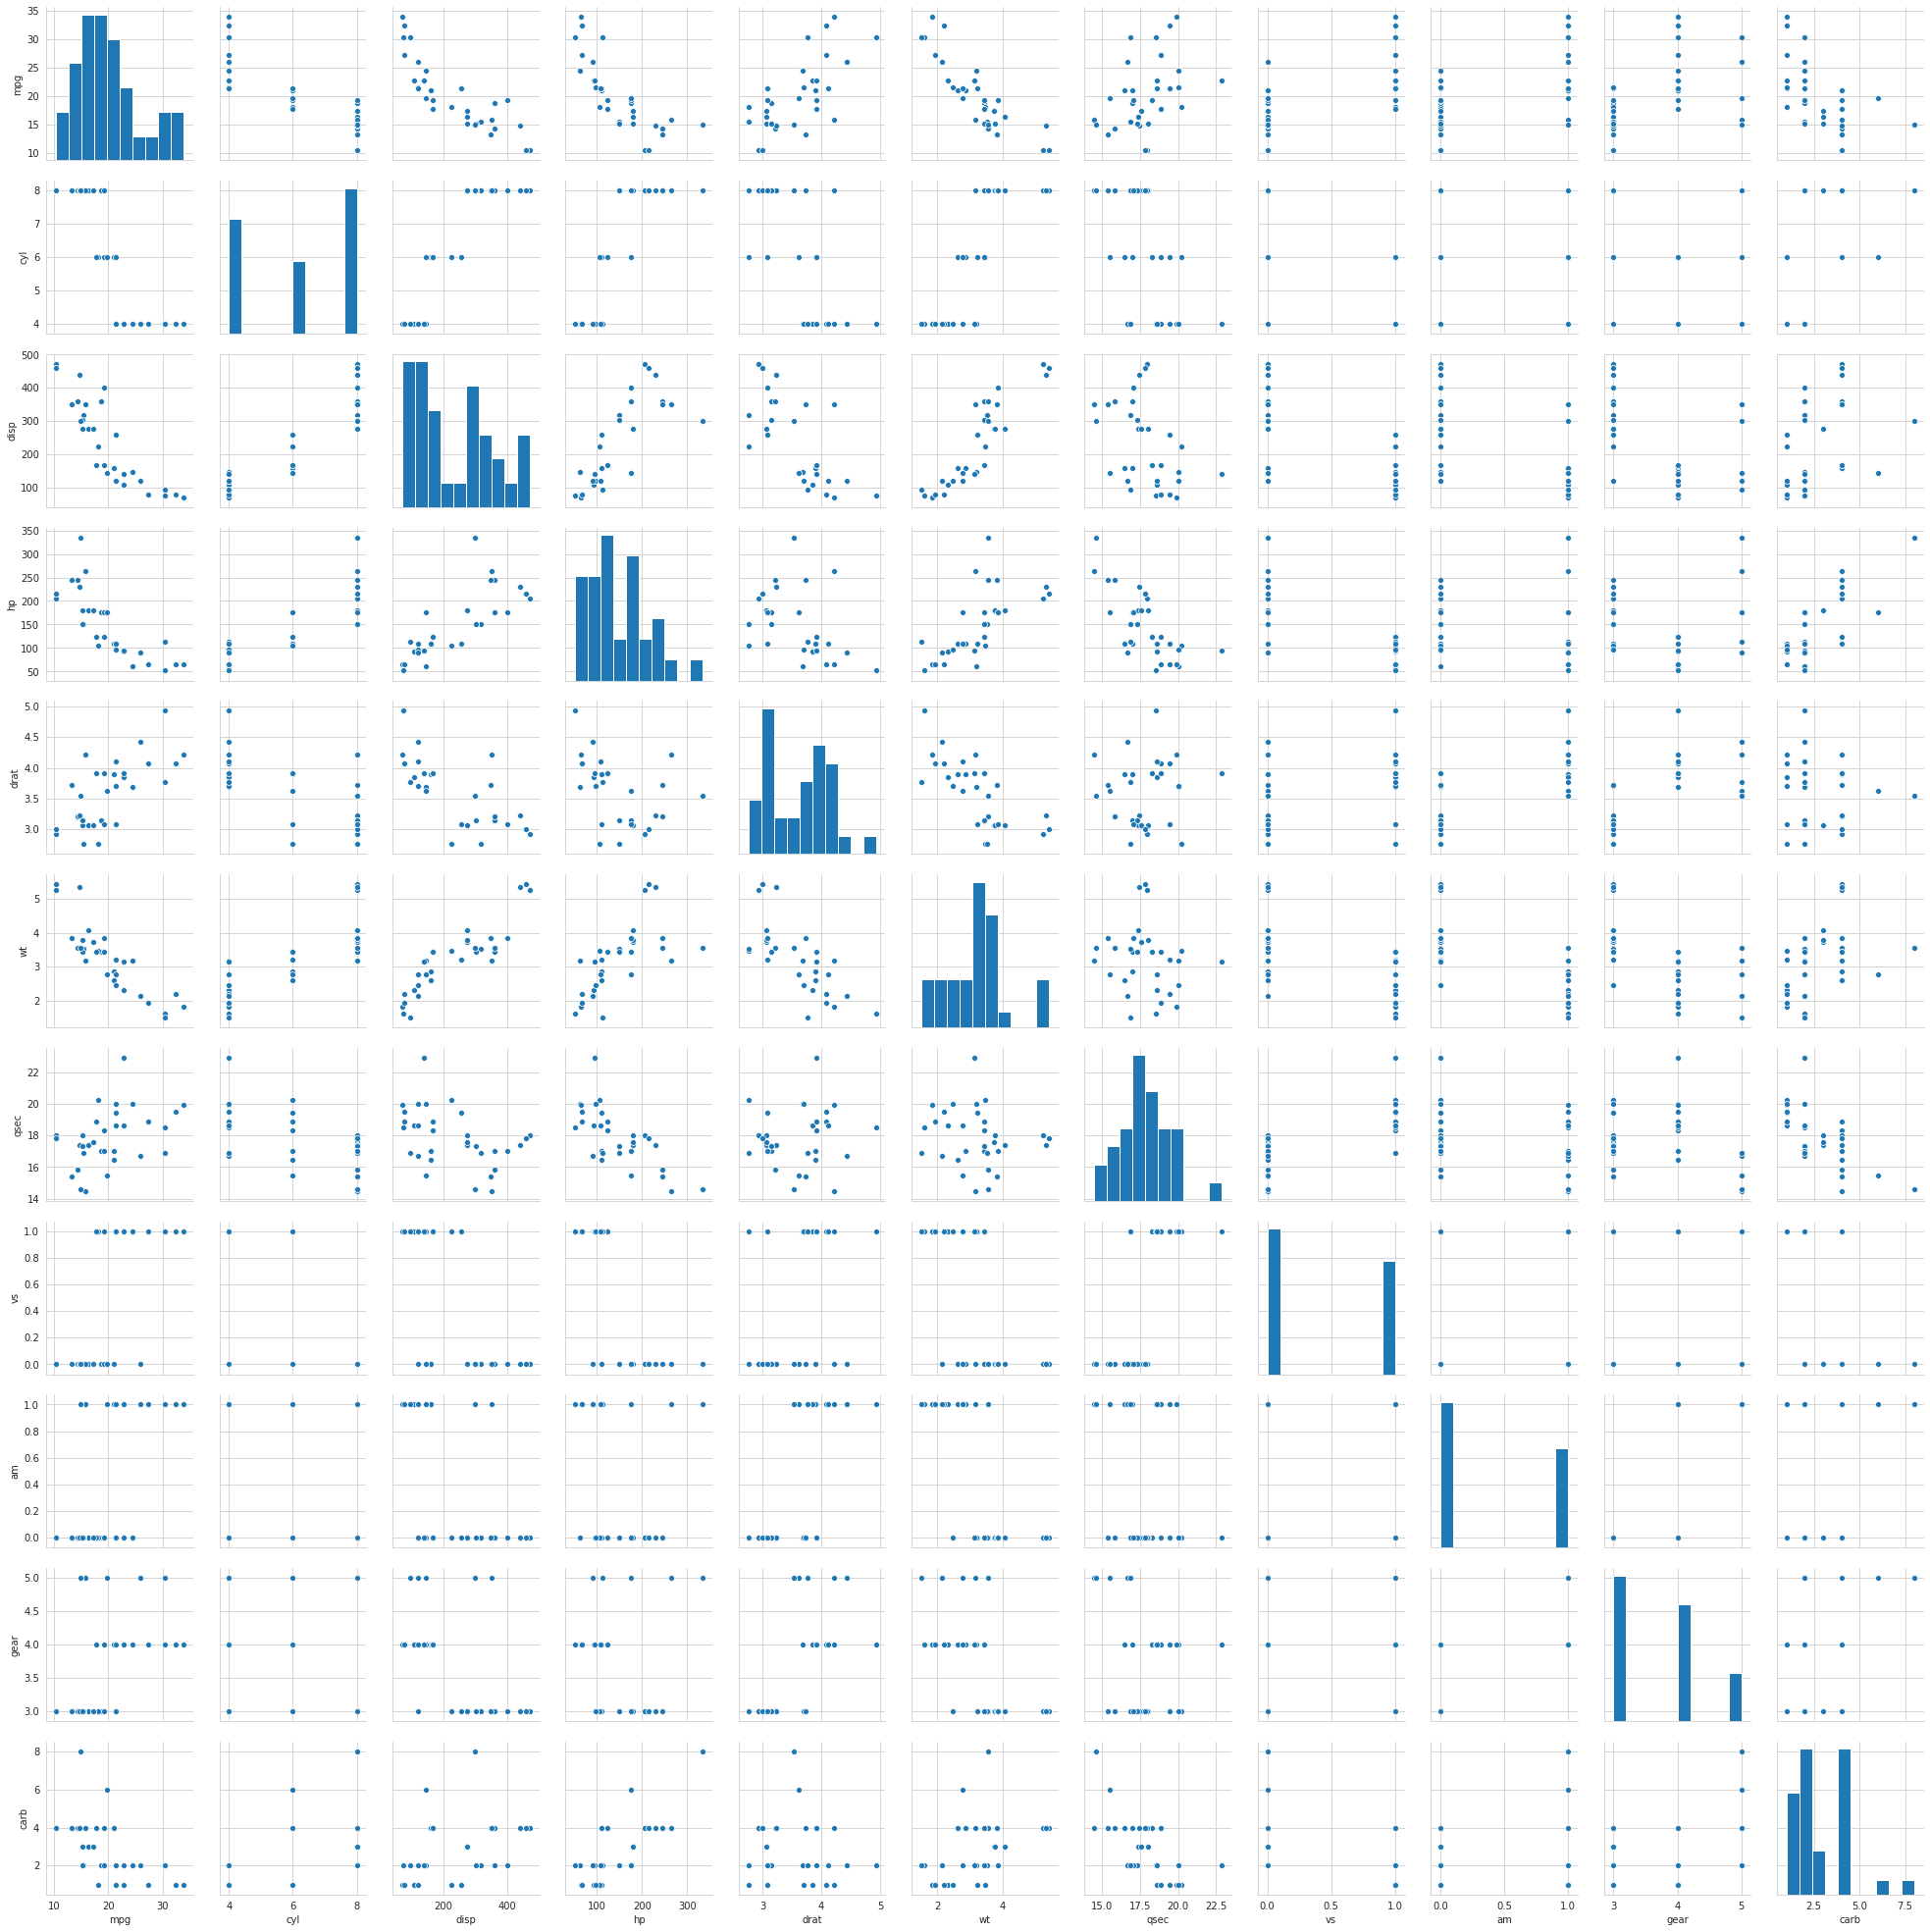

In [9]:
sb.pairplot(cars)

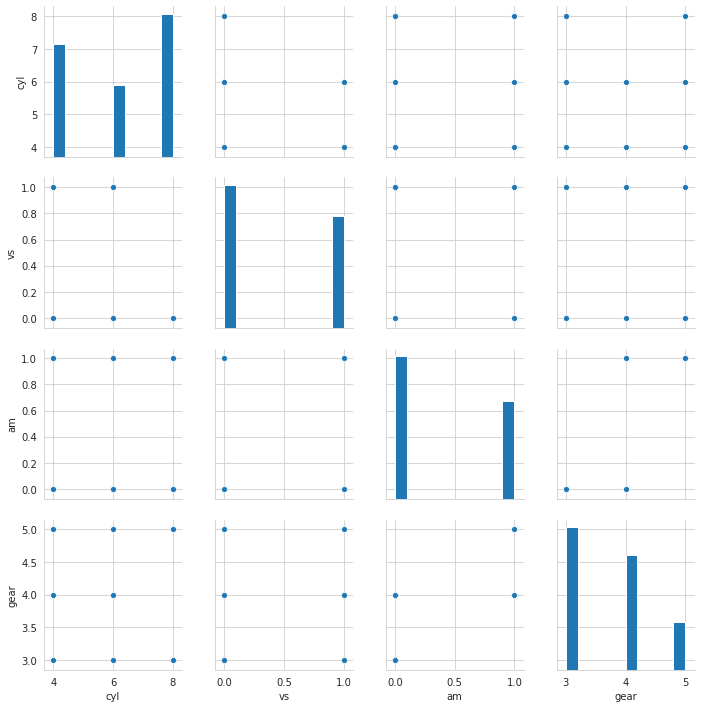

In [11]:
X = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(X)

In [16]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

In [23]:
def spearman_coefficient(column1, column2):
    spearman_coefficient, p_value = spearmanr(column1, column2)
    print(f'{column1.name} - {column2.name}')
    print(f'spearman Rank Correlation Coefficient {spearman_coefficient:0.3}')
    print(f'Two-tailed p-value {p_value:0.3}')

In [24]:
spearman_coefficient(cyl, vs)

cyl - vs
spearman Rank Correlation Coefficient -0.814
Two-tailed p-value 1.48e-08


In [25]:
spearman_coefficient(cyl, am)

cyl - am
spearman Rank Correlation Coefficient -0.522
Two-tailed p-value 0.00218


In [27]:
spearman_coefficient(cyl, gear)

cyl - gear
spearman Rank Correlation Coefficient -0.564
Two-tailed p-value 0.000768


In [30]:
spearman_coefficient(vs, gear)

vs - gear
spearman Rank Correlation Coefficient 0.283
Two-tailed p-value 0.117


In [28]:
spearman_coefficient(vs, am)

vs - am
spearman Rank Correlation Coefficient 0.168
Two-tailed p-value 0.357


In [29]:
spearman_coefficient(am, gear)

am - gear
spearman Rank Correlation Coefficient 0.808
Two-tailed p-value 2.3e-08


## Chi-square test for independence

In [33]:
from scipy.stats import chi2_contingency

In [46]:
def chi2_test(column1, column2):
    table = pd.crosstab(column1, column2)
    chi2, p, dof, expected = chi2_contingency(table.values)
    print(f'Chi-square Statistic = {chi2:0.3}')
    print(f'P-value {p:0.3}')
    print(f'Degrees of freedom = {dof}')
    print(f'The expected frequencies, based on the marginal sums of the table = {expected}')   

In [47]:
chi2_test(cyl, vs)

Chi-square Statistic = 21.3
P-value 2.32e-05
Degrees of freedom = 2
The expected frequencies, based on the marginal sums of the table = [[6.1875 4.8125]
 [3.9375 3.0625]
 [7.875  6.125 ]]


In [48]:
chi2_test(cyl, am)

Chi-square Statistic = 8.74
P-value 0.0126
Degrees of freedom = 2
The expected frequencies, based on the marginal sums of the table = [[6.53125 4.46875]
 [4.15625 2.84375]
 [8.3125  5.6875 ]]


In [49]:
chi2_test(cyl, gear)

Chi-square Statistic = 18.0
P-value 0.00121
Degrees of freedom = 4
The expected frequencies, based on the marginal sums of the table = [[5.15625 4.125   1.71875]
 [3.28125 2.625   1.09375]
 [6.5625  5.25    2.1875 ]]


In [50]:
chi2_test(vs, am)

Chi-square Statistic = 0.348
P-value 0.556
Degrees of freedom = 1
The expected frequencies, based on the marginal sums of the table = [[10.6875  7.3125]
 [ 8.3125  5.6875]]


In [51]:
chi2_test(vs, gear)

Chi-square Statistic = 12.2
P-value 0.00222
Degrees of freedom = 2
The expected frequencies, based on the marginal sums of the table = [[8.4375 6.75   2.8125]
 [6.5625 5.25   2.1875]]


In [52]:
chi2_test(am, gear)

Chi-square Statistic = 20.9
P-value 2.83e-05
Degrees of freedom = 2
The expected frequencies, based on the marginal sums of the table = [[8.90625 7.125   2.96875]
 [6.09375 4.875   2.03125]]
